In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [45]:
heart_df=pd.read_csv("framingham.csv")

In [46]:
#Data Exploration

heart_df.shape

(4238, 16)

In [47]:
## 1st five columns
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [48]:
## information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [49]:
## stats
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [50]:
## unique values
heart_df.nunique()/heart_df.shape[0]

male               0.000472
age                0.009202
education          0.000944
currentSmoker      0.000472
cigsPerDay         0.007787
BPMeds             0.000472
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058518
sysBP              0.055215
diaBP              0.034450
BMI                0.321614
heartRate          0.017225
glucose            0.033742
TenYearCHD         0.000472
dtype: float64

In [51]:
## null values
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [52]:
## Replacing null values with the mean value
heart_df["education"].fillna(heart_df["education"].mean(),inplace=True)
heart_df["cigsPerDay"].fillna(heart_df["cigsPerDay"].mean(),inplace=True)
heart_df["BPMeds"].fillna(heart_df["BPMeds"].mean(),inplace=True)
heart_df["totChol"].fillna(heart_df["totChol"].mean(),inplace=True)
heart_df["BMI"].fillna(heart_df["BMI"].mean(),inplace=True)
heart_df["heartRate"].fillna(heart_df["heartRate"].mean(),inplace=True)
heart_df["glucose"].fillna(heart_df["glucose"].mean(),inplace=True)

In [53]:
## Rechecking for null values
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

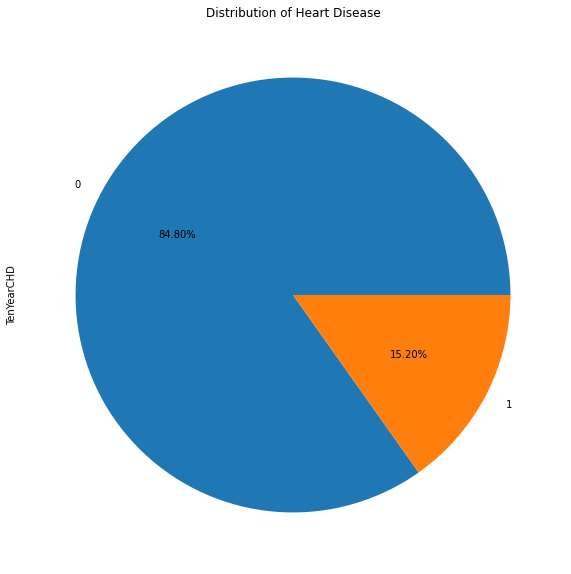

In [54]:
#Data Visualization
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
heart_df["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Text(0.5, 1.0, 'Heart Rate impact on Heart Disase')

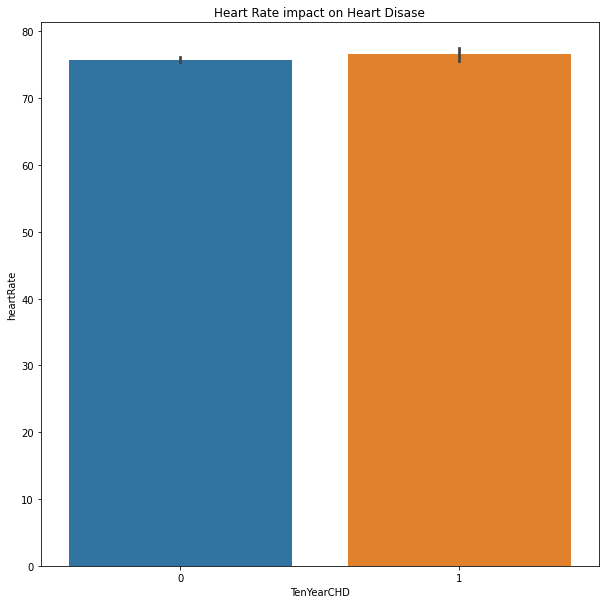

In [55]:
## bar plot to plot heart disease affect on heart rate
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="heartRate",data=heart_df)
plt.title("Heart Rate impact on Heart Disase")

In [56]:
## Defining variables X,y 
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64
shape of X: (4238, 15)
shape of y: 4238


In [57]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
## Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [59]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
## Predicting data
y_pred=model.predict(X_test)

In [61]:
## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       908
           1       0.71      0.11      0.19       152

    accuracy                           0.87      1060
   macro avg       0.79      0.55      0.56      1060
weighted avg       0.85      0.87      0.82      1060



In [62]:
#Finding best parameters for our Logistic classifier model
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10,random_state=42, test_size = 0.25, train_size=None)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84990566        nan 0.85              nan 0.84858491
        nan 0.84811321        nan 0.8495283         nan 0.84981132
        nan 0.84896226        nan 0.84792453        nan 0.84877358
        nan 0.84990566        nan 0.84981132        nan 0.84943396
        nan 0.8490566         nan 0.84924528        nan 0.84915094
        nan 0.8495283         nan 0.84933962        nan 0.84915094
        nan 0.84896226        nan 0.84896226        nan 0.84886792
        nan 0.84971698        nan 0.84867925        nan 0.84896226
        nan 0.84981132        nan 0.84943396        nan 0.84962264]
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [63]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'C': 0.3, 'penalty': 'l2'}
0.85
LogisticRegression(C=0.3)


In [64]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8522888154789995

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_pred = knn.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       908
           1       0.30      0.15      0.20       152

    accuracy                           0.83      1060
   macro avg       0.58      0.55      0.55      1060
weighted avg       0.79      0.83      0.80      1060



In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [70]:
knn_cv.best_score_

0.8467577873520528

In [71]:
knn_cv.best_params_

{'n_neighbors': 12}

In [72]:
# necessary imports:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Your Code Here(Uncomment best_features and write your code):
best_features = SelectKBest(score_func=chi2, k=12)
fit = best_features.fit(X,y) # Run score function on (X, y) and get the appropriate features.
select_kbest = best_features.fit_transform(X, y)

In [73]:
select_kbest.dtype

dtype('float64')

In [74]:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores.head()

,Features,Scores
0,male,18.915212
1,age,318.597444
2,education,6.188170
3,currentSmoker,0.811603
4,cigsPerDay,221.677041


In [75]:
# Split the data into X & y

X = heart_df.drop('TenYearCHD', axis = 1).values
y = heart_df['TenYearCHD']
y = y.astype(int)

print(X.shape)
print(y.shape)

(4238, 15)
(4238,)


In [76]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [77]:
dt.score(X_test, y_test)# make prediciton

0.8566037735849057

In [78]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(heart_df.drop('TenYearCHD', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for male is : 0.03664660114204833
The feature importance for age is : 0.1901424993858559
The feature importance for education is : 0.03035451814022342
The feature importance for currentSmoker is : 0.0012033750430419858
The feature importance for cigsPerDay is : 0.04447340923545073
The feature importance for BPMeds is : 0.0
The feature importance for prevalentStroke is : 0.0
The feature importance for prevalentHyp is : 0.04156626768518641
The feature importance for diabetes is : 0.0
The feature importance for totChol is : 0.08647009124595888
The feature importance for sysBP is : 0.13366782012011325
The feature importance for diaBP is : 0.08218357626219149
The feature importance for BMI is : 0.14605450890602706
The feature importance for heartRate is : 0.09718151369205466
The feature importance for glucose is : 0.1100558191418479


In [79]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

,Feature,Feature Importance
0,male,0.036647
1,age,0.190142
2,education,0.030355
3,currentSmoker,0.001203
4,cigsPerDay,0.044473
5,BPMeds,0.000000
6,prevalentStroke,0.000000
7,prevalentHyp,0.041566
8,diabetes,0.000000
9,totChol,0.086470


In [80]:
# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()


In [84]:
X_pef= heart_df.drop(["TenYearCHD", "diabetes", "prevalentStroke", "BPMeds"],axis=1)
y_pef=heart_df["TenYearCHD"]
print("Columns in X :",X)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : [[  1.          39.           4.         ...  26.97        80.
   77.        ]
 [  0.          46.           2.         ...  28.73        95.
   76.        ]
 [  1.          48.           1.         ...  25.34        75.
   70.        ]
 ...
 [  0.          48.           2.         ...  22.          84.
   86.        ]
 [  0.          44.           1.         ...  19.16        86.
   81.96675325]
 [  0.          52.           2.         ...  21.47        80.
  107.        ]]
y : 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int32
shape of X: (4238, 15)
shape of y: 4238


In [85]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X_pef,y_pef)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [86]:
dt.score(X_pef, y_pef)

0.8973572439830109